In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Погрешность в окрестности нуля

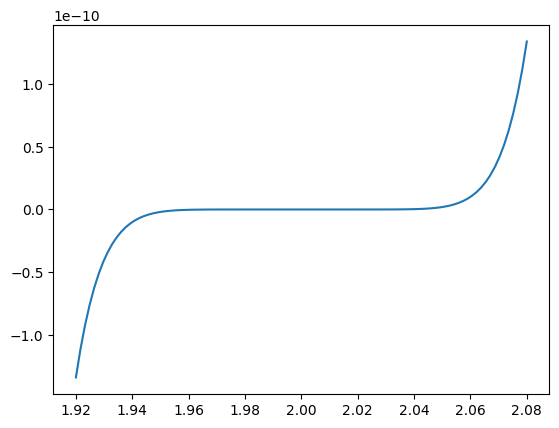

In [13]:
x = np.linspace(2.-0.08, 2.+0.08, 100)

plt.plot(x, (x-2)**9)

In [8]:
for subx in x:
    print((subx-2)**9) 

-1.3421772800000106e-19
-1.116962878683558e-19
-9.259884701640284e-20
-7.646094627893894e-20
-6.287321413485332e-20
-5.147581025470639e-20
-4.195332680553794e-20
-3.403011862344512e-20
-2.746603460729633e-20
-2.2052523901487678e-20
-1.7609091622814655e-20
-1.39800800471969e-20
-1.1031752304360355e-20
-8.649656734455477e-21
-6.736251138758692e-21
-5.2087672074660246e-21
-3.997296431438591e-21
-3.043079800948865e-21
-2.2969845636598388e-21
-1.7181522558046733e-21
-1.2728031349776544e-21
-9.33183030181572e-22
-6.766394845989035e-22
-4.848148991698987e-22
-3.429451903310516e-22
-2.3925325324495376e-22
-1.6442727255475129e-22
-1.1117464607064313e-22
-7.384298289884794e-23
-4.8100306309101436e-23
-3.066723313769929e-23
-1.909451571962845e-23
-1.1579919243503993e-23
-6.818967027382389e-24
-3.884618517449539e-24
-2.1314498199226712e-24
-1.1203842860079464e-24
-5.604710818655873e-25
-2.646327900962332e-25
-1.166989058406107e-25
-4.741060967238591e-26
-1.7423420735214037e-26
-5.6482571798325015e

$x^9-18 x^8 + 144 x^7 - 672 x^6 + 2016 x^5- 4032 x^4 + 5376 x^3 - 4608 x^2 + 2304 x - 512$

In [9]:
def f(x):
    return x**9-18 *x**8 + 144 * x**7 - 672 * x**6 + 2016 * x**5- 4032 * x**4 + 5376 * x**3 - 4608 * x**2 + 2304 * x - 512

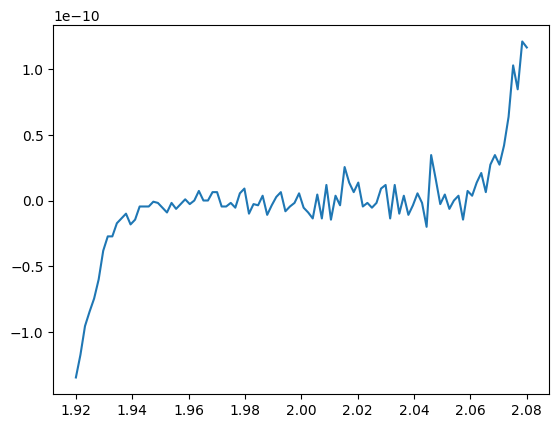

In [12]:
x = np.linspace(2.-0.08, 2.+0.08, 100)

plt.plot(x, f(x))

Получается, что та же функция вычисляется ну совсем не точно, даже флуктуирует вокруг нуля.

### Схема Горнера
$$
P_n(x) = x(x(x(x - 18) + 144)+ \ldots - 512).
$$
Так получится посчитать гораздо быстрее. Тем не менее, с вычислительной погрешностью здесь возникают проблемы. Перепишем схему в рекурентном виде:
$$
P_{k+1}(x)= x* P_k(x) + a_{k-1} (1 + \epsilon_k) 
$$
$$
\text{Error} = x*P_k(x) \epsilon _k + a_{k-1} \hat \epsilon _k 
$$
Погрешность удовлетворяет рекурентному соотношени выше, как следствие, экспоненциально растет, как следствие 10 в -15 поднимается на три порядка. Опасность вычислений в том, что мы сидим в окрестности нуля. Так что, например, метод бисекции не сработает даже для такого простого полинома.

### Быстрое возведение в степень

Просто представим в двоичном разложении саму стеень p, то есть 
$$n^p = n^{a_0 + a_1 2 + ... + a_k 2^k}$$
А потом перемножаем в духе:
$$
n^p = n^{a_0} * (n^2) ^{a_1} * (n^4) ^{a_2} * (n^8) ^{a_3} * ...
$$

#### Система BLAS, ATLAS, LAPACK
Хотим научиться делать методы линейной алгебры
1) $\alpha x[.] + y[.]$ 
2) $Ax, xy^{T}$
3) $C = AB+C$

Это пакеты, которые делают это быстро и безопасно. Разберем как перемножать матрицы(было на лекции).
$$
c_{ij} = \sum_{k=1}^m A_{ik} B_{kj} \
$$
Имеем такой код для обычной реализации, где ходим по строке и столбцу и это плохо, так кэш тогда просто не нормирует свою работу для обоих случаев
```cpp
for(i)
    for(j)
        for(k)
            c[i, j] = A[i, k]*B[k, j]
```
Улучшение. Зафиксируем один элемент $A$, тем самым мы суммируем только столбцы и кэш уже подстроиться
```cpp
for(i)
    for(k) d = A[k, i]
        for(j)
            c[i, j] = d*B[k, j]
```
Также есть блочные алгоритмы. В кэше должны храниться вектора, на каждом шаге закачали два ветрок и сделали n действий и выкинули, и уже не факт что в кэше есть следующий элемент. Идея: хотим закачать $n^2$ и вычисляли за $n^3$. Будем представлять матрицы в набор матриц и перемножаем уже маленькие подматрицы. И хранить надо именно по матрицам. 